# 03. Основы математической статистики: методы построения оценок

## Эмпирическая функция распределения

Пусть из некоторого распределения нам на вход пришла случайная выборка
$X = \{x_1, \ldots, x_n\}$. Но какие условия налагаются на определение
*случайная выборка*?

Под случайной выборкой мы будем понимать множество
значений, удовлетворяющее следующим условиям:

1.  все элементы выборки -- случайные величины;

2.  все элементы выборки могут быть выбраны равновероятно;

3.  каждый элемент конкретной выборки получен в равных условиях.

Таким образом, элементы выборки - это независимые, одинаково
распределенные случайные величины.\
\
Например, используя пакет scipy, мы можем сгенерировать случайную
выборку на 10 элементов из нормального распределения с параметрами
$(0,1)$ на Python следующим образом:

In [ ]:
from scipy.stats import norm

n = 10

norm_distribution = norm(0, 1)
random_sample = norm_distribution.rvs(n, random_state=42)
print(random_sample)

[ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696
  1.57921282  0.76743473 -0.46947439  0.54256004]


Итак, мы определили вид данных, которые поступают к нам на вход. На
практике нам неизвестно распределение, из которого была получена
случайная выборка. Поэтому по известным нам данным мы должны каким-то
образом смоделировать исходное распределение.

В теории вероятностей
распределение случайных величин определяется *функцией распределения*
случайной величины. Следовательно, нам нужно каким-то образом построить
аналог функции распределения для нашего случая.\
\
Введем фиктивную случайную величину $\xi$ такую, что
$$\mathbf P(\xi= x_1) = \ldots = \mathbf P(\xi= x_n) = \frac{1}{n},$$
то есть эта случайная величина равновероятно принимает любое из значений
выборки. Тогда мы можем построить функцию распределения этой случайной
величины
$$F_\xi(x) = \mathbf P(\xi\leqslant x) = \frac{1}{n} \sum_{i=1}^{n} [x_i \leqslant x] = \frac{1}{n} \sum_{i=1}^{n} \mathbb I(x - x_i),$$
где функция
$$\mathbb I(z) = \begin{cases} 1,\ z > 0,\\ 0,\ z\leqslant 0. \end{cases}$$
        называется *единичной функцией Хевисайда*.\
\
$\bullet$ *Построенная функция распределения*

$$F_n(x) =  \frac{1}{n} \sum_{i=1}^{n} \mathbb I(x - x_i)$$
*и будет
являться **эмпирической функцией распределения** выборки.*

Чтобы построить эту функцию на практике, вводится понятие *вариационного
ряда*.\
\
$\bullet$ ***Вариационным рядом** случайной выборки называется
упорядоченная последовательность элементов выборки*
$$x^{(1)} \leqslant\ldots \leqslant x^{(n)},$$ *где
$x^{(1)} = \underset{x_1,\ldots, x_{n}}{\min} X$,
$x^{(n)} = \underset{x_1,\ldots, x_{n}}{\max} X$.*\
\
То есть, взяв исходную выборку $X = \{x_1,\ldots, x_n\}$, мы
упорядочиваем (сортируем) ее элементы по возрастанию. Тогда эмпирическую
функцию распределения можно представить в виде
$$F_n(x) = \begin{cases} 0,\ x \leqslant x^{(1)},\\ \dfrac 1n,\ x \in (x^{(1)}, x^{(2)}],\\ \dfrac2n,\ x \in (x^{(2)}, x^{(3)}],\\ \vdots\\ 1,\ x > x^{(n)}. \end{cases}$$

Вернемся к рассматриваемой нами выборке
из нормального распределения. Сделав сортировку ее элементов, мы можем
получить соответствующий вариационный ряд:

In [ ]:
var_series = sorted(random_sample)
var_series

[-0.4694743859349521,
 -0.23415337472333597,
 -0.23413695694918055,
 -0.13826430117118466,
 0.4967141530112327,
 0.5425600435859647,
 0.6476885381006925,
 0.7674347291529088,
 1.5230298564080254,
 1.5792128155073915]

Тогда эмпирическую функцию распределения можно построить следующим
образом
$$F_n(x) = \begin{cases} 0,\ x \leqslant-0.46947,\\ \dfrac1{10},\ x \in (-0.46947, -0.23415],\\ \dfrac2{10},\ x \in (-0.23415, -0.23414],\\ \vdots\\ 1,\ x > 1.57921. \end{cases}$$

In [ ]:
import numpy as np

x_values = np.concatenate(([-np.inf], var_series, [np.inf]))  # границы
y_values = np.arange(0, n + 1) / n  # значения ЭФР
print(x_values)
print(y_values)

[       -inf -0.46947439 -0.23415337 -0.23413696 -0.1382643   0.49671415
  0.54256004  0.64768854  0.76743473  1.52302986  1.57921282         inf]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


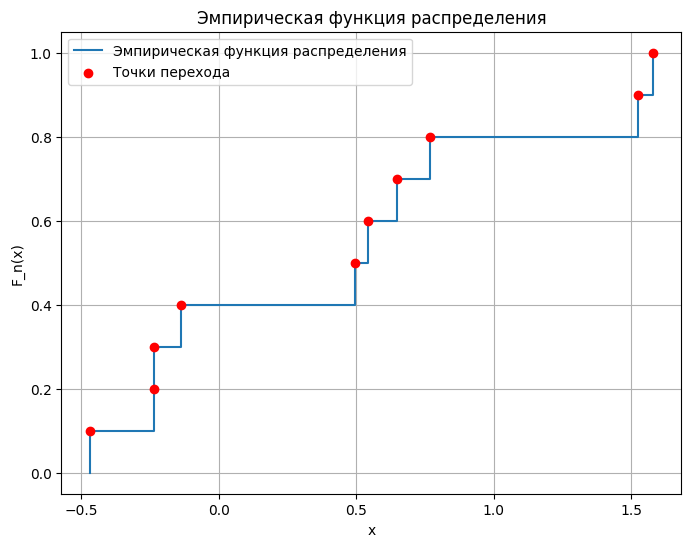

In [ ]:
import matplotlib.pyplot as plt

x_plot = []
y_plot = []

for i in range(len(var_series)):
    x_plot.extend([var_series[i], var_series[i]])
    y_plot.extend([y_values[i], y_values[i + 1]])

x_plot = [x_values[0]] + x_plot + [x_values[-1]]
y_plot = [0] + y_plot + [1]

plt.figure(figsize=(8, 6))
plt.step(x_plot, y_plot, where='post', label="Эмпирическая функция распределения")
plt.scatter(var_series, np.arange(1, n + 1) / n, color='red', zorder=5, label="Точки перехода")
plt.title("Эмпирическая функция распределения")
plt.xlabel("x")
plt.ylabel("F_n(x)")
plt.legend()
plt.grid()
plt.show()

In [ ]:
print("Эмпирическая функция распределения F_n(x):")
for i in range(n):
    if i == 0:
        print(f"0, x ≤ {var_series[i]:.5f}")
    else:
        print(f"{i/n}, x ∈ ({var_series[i-1]:.5f}, {var_series[i]:.5f}]")
print(f"1, x > {var_series[-1]:.5f}")

Эмпирическая функция распределения F_n(x):
0, x ≤ -0.46947
0.1, x ∈ (-0.46947, -0.23415]
0.2, x ∈ (-0.23415, -0.23414]
0.3, x ∈ (-0.23414, -0.13826]
0.4, x ∈ (-0.13826, 0.49671]
0.5, x ∈ (0.49671, 0.54256]
0.6, x ∈ (0.54256, 0.64769]
0.7, x ∈ (0.64769, 0.76743]
0.8, x ∈ (0.76743, 1.52303]
0.9, x ∈ (1.52303, 1.57921]
1, x > 1.57921


Таким образом, как мы видим, эмпирическая функция распределения
случайной выборки имеет ступенчатый вид, а точнее кусочно-постоянный.

Запишем всё в виде отдельной функции.

In [ ]:
def cdf(random_sample):
    n = len(random_sample)
    var_series = sorted(random_sample)
    x_values = np.concatenate(([-np.inf], var_series, [np.inf]))  # границы
    y_values = np.arange(0, n + 1) / n  # значения ЭФР

    x_plot = []
    y_plot = []

    for i in range(len(var_series)):
        x_plot.extend([var_series[i], var_series[i]])
        y_plot.extend([y_values[i], y_values[i + 1]])

    x_plot = [x_values[0]] + x_plot + [x_values[-1]]
    y_plot = [0] + y_plot + [1]

    plt.figure(figsize=(8, 6))
    plt.step(x_plot, y_plot, where='post', label="Эмпирическая функция распределения")
    #plt.scatter(var_series, np.arange(1, n + 1) / n, color='red', zorder=5, label="Точки перехода")
    plt.title("Эмпирическая функция распределения")
    plt.xlabel("x")
    plt.ylabel("F_n(x)")
    plt.legend()
    plt.grid()
    plt.show()

## Точечные оценки параметров распределения

Пусть из некоторого распределения нам на вход пришла случайная выборка
$X = \{x_1, \ldots, x_n\}$.\
\
$\bullet$ ***Статистикой** $t$ выборки называется любая функция,
зависящая только от элементов выборки, то есть $t = t(X)$.*\
\
То есть все функции, которые мы далее будем строить, основываясь на
элементах выборки, будут являться статистиками выборки.\
\
Пусть мы смогли найти функцию распределения
$F(x_1,\ldots, x_n, \theta) = F(X,\theta)$ с точностью до параметра
$\theta$. Истинного параметра распределения мы не знаем.
Следовательно, нам нужно построить некоторую оценку параметра
распределения $\theta$.\
\
$\bullet$ ***Оценкой $\hat\theta$ параметра распределения $\theta$**
называется, вообще говоря, любая функция, зависящая от элементов
выборки, то есть $\hat \theta= \hat \theta(x_1,\ldots, x_n)$. Причем
оценка параметра $\hat\theta$ является случайной величиной, так как
элементы выборки $x_1,\ldots, x_n$ являются случайными величинами.*\
\
Далее в этом параграфе мы будем заниматься рассмотрением основных
методов, предназначенных для построения оценок $\hat\theta$. Однако
сперва мы рассмотрим основные характеристики, по которым мы сможем
делать некоторые выводы об адекватности построенных оценок.

### Свойства точечных оценок

$\bullet$ *Оценка $\hat\theta(x_1,\ldots, x_n)$ параметра
распределения $\theta$ называется **несмещенной**, если*
$$\mathbf E\{\hat \theta\} = \theta,$$ *в противном случае --
**смещенной**. Число $\mathbf E\{\hat \theta- \theta\}$ также иногда
называют **смещением оценки $\hat \theta$***. \
\
$\bullet$ *Оценка $\hat\theta(x_1,\ldots, x_n)$ параметра
распределения $\theta$ называется **состоятельной**, если $\forall \varepsilon >0$
$$\mathbf P\{ |\hat \theta -\theta|>\varepsilon\} \xrightarrow[n\to\infty]{}  0$$ в
противном случае -- **несостоятельной**.*\
\
Рассмотрим класс построенных оценок $\mathcal K = \{\hat \theta\}$ (то
есть некоторое множество построенных оценок). Возьмем из этого класса
одну оценку параметров распределения $\theta^* \in \mathcal K$.\
\
$\bullet$ *Оценка $\theta^*$ параметра распределения $\theta$
называется **эффективной** в классе оценок $\mathcal K$, если она имеет
наименьшую дисперсию
$\mathbf D\{\hat\theta\} = \mathbf E\{\hat \theta- \theta\}^2$, то есть*
$$\mathbf D\{\theta^*\} = \mathbf E\{\theta^* - \theta\}^2\leqslant\mathbf E\{\hat \theta- \theta\}^2 = \mathbf D\{\hat \theta\},\ \forall \hat\theta\in \mathcal K.$$
Определение эффективности оценки можно также трактовать так: среди
построенных оценок эффективной будет являться та оценка, которая
обладает наименьшей дисперсией среди всех оценок.\
\
На
практике дисперсия будет нулевой только в вырожденном случае. Поэтому
важно построить оценку снизу для $\mathbf D\{\hat \theta\}$.\
\
Из неравенства Рао-Крамера следует, что если плотность распределения
выборки $p(X, \theta) = \prod_{i=1}^{n} p(x_i, \theta)$ дважды
дифференцируема по $\theta$ и удовлетворяет условиям регулярности, то
дисперсия любой несмещенной оценки может быть оценена снизу
$$\mathbf D\{\hat \theta\}\geqslant\dfrac{1}{n I(\theta)},$$ где
$$I(\theta) = \mathbf E\left\{\dfrac{\partial^2 \ln p(x_i, \theta)}{\partial\theta^2}\right\},\ i=\overline{1, n}$$
-- это количество информации по Фишеру в одном выборочном значении. Это
неравенство можно легко доказать, но мы не будем на этом
останавливаться.\
\
Таким образом, в практическом случае мы сможем построить такую оценку
параметров распределения, дисперсия которой будет минимальная, причем мы
точно знаем, какого минимального значения она может достигать.


### Выборочный метод построения точечных оценок

Мы определились с характеристиками точечных оценок. Здесь и далее мы
будем рассматривать основные методы построения точечных оценок. Причем
нас будут интересовать именно те оценки, характеристики которых будут
самыми лучшими, то есть оценки должны быть несмещенными, состоятельными
и эффективными в своем классе оценок.\
\
Первый метод построения точечных оценок называется *выборочным методом*.
И негласно мы уже им воспользовались, когда определяли эмпирическую
функцию распределения. Теперь же мы подробнее остановимся на
рассмотрении этого способа построения оценок.\
\
Вспомним, что мы делали, когда строили эмпирическую функцию
распределения. Введем фиктивную случайную величину $\xi$ такую, что
$$\mathbf P\{\xi= x_1\} = \ldots = \mathbf P\{\xi= x_n\} = \frac{1}{n},$$
то есть эта случайная величина равновероятно принимает любое из значений
выборки. Тогда мы определяли эмпирическую функцию распределения как
функцию распределения случайной величины $\xi$, то есть
$$F_\xi(x) = \mathbf P\{\xi\leqslant x\} = \frac{1}{n} \sum_{i=1}^{n} \mathbb I(x - x_i).$$
Но что же мы можем сказать об адекватности построенной оценки? Теперь мы
умеем характеризовать оценки. Тогда определим, является ли эта оценка
несмещенной и состоятельной. Сперва докажем *несмещенность*
$$\mathbf E\{F_n(x)\} = \mathbf E\left\{ \frac{1}{n} \sum_{i=1}^{n} \mathbb I(x - x_i)\right\} = \frac{1}{n} \sum_{i=1}^{n} \mathbf E\{\mathbb I(x - x_i)\} = \frac{1}{n} \sum_{i=1}^{n} 1\cdot \mathbf P\{\mathbb I(x - x_i)\} = \frac{1}{n} \sum_{i=1}^{n} 1\cdot \mathbf P\{x_i < x\} = F(x).$$ Теперь докажем *состоятельность*, применяя
теорему усиленного закона больших чисел
$$F_n(x) = \frac{1}{n} \sum_{i=1}^{n} \mathbb I(x - x_i) \xrightarrow[n\to\infty]{\text{п.н.}} \mathbf E\{\mathbb I(x - x_i)\}=F(x),$$
где *последовательность случайных величин $\xi_n$ **сходится почти наверное** (почти всюду) к случайной величине $\xi$, то есть $$\xi_n \xrightarrow[n \to \infty]{\text{п.н.}}\xi,$$ если*
$$
	\lim_{n \to \infty} \xi_n = \xi, \text{ если }
	P\{\omega : \lim_{n \to \infty} \xi_n(\omega) = \xi(\omega)\} = 1
$$
Таким образом, эмпирическая функция распределения является *несмещенной
и состоятельной выборочной оценкой* функции распределения.\
\
По аналогии мы должны построить выборочные оценки для математического
ожидания, моментов $k$-ого порядка и дисперсии.\
\
Определим выборочный аналог математического ожидания. По аналогии с
эмпирической функцией распределения, мы определим математическое
ожидание от выборки как математическое ожидание фиктивной случайной
величины $\xi$, тогда
$$\mathbf E\{\xi\} = \dfrac{1}n\sum\limits_{i=1}^nx_i=\mu.$$
$\bullet$ *Число $$\overline x = \dfrac{1}n\sum\limits_{i=1}^nx_i,$$
являющееся средним арифметическим значений выборки, называется
**выборочным средним**.*\
\
Как можно видеть, в случае со случайной выборкой математическое
ожидание, то есть среднее ожидаемое значение случайной величины,
является просто средним арифметическим от всех значений.\
\
Докажем *несмещенность* построенной оценки
$$\mathbf E\{\overline x\} = \mathbf E\left\{ \dfrac{1}n\sum\limits_{i=1}^nx_i\right\} = \dfrac{1}n\sum\limits_{i=1}^n\mathbf E\{x_i\} = \mu.$$
Докажем *состоятельность* построенной оценки
$$\overline x = \dfrac{1}n\sum\limits_{i=1}^nx_i \xrightarrow[n\to\infty]{\text{п.н.}} \mathbf E\{x_i\} = \mu.$$
Подобно математическому ожиданию определим выборочные аналоги для
начальных моментов $k$-ого порядка
$$\mathbf E\{\xi^k\} = \dfrac 1n \sum\limits_{i=1}^nx_i^k = a_k.$$
$\bullet$ *Число $$\alpha_k = \dfrac 1n \sum\limits_{i=1}^nx_i^k$$
называется **выборочным начальным моментом $k$-ого порядка.***\
\
Построим выборочный аналог дисперсии
$$\mathbf D\{\xi\} = \dfrac{1}n\sum\limits_{i=1}^n(x_i - \overline x)^2 = S^2.$$
$\bullet$ *Число
$$\sigma^2 = \dfrac{1}n\sum\limits_{i=1}^n(x_i - \overline x)^2,$$
являющееся среднеквадратичным отклонением значений выборки от среднего
арифметического, называется **выборочной дисперсией**.*\
\
Исследуем выборочную оценку дисперсии на несмещенность
$$\mathbf E\{\sigma^2\}= \mathbf E\{\alpha_2 - \overline x^2\} = \mathbf E\{\alpha_2\} - \mathbf E\{\overline x^2\} = a_2 - \mathbf E\{\overline x^2\}.$$
Вычислим отдельно $\mathbf E\{\overline x^2\}$
$$\mathbf E\{\overline x^2\} = \mathbf E\left\{\dfrac{1}n\sum\limits_{i=1}^n\right\}^2 = \dfrac{1}{n^2} \sum\limits_{i=1}^n\mathbf E\{x_i\}^2 - \dfrac{1}{n^2} \sum_{i<j} \mathbf E\{x_i x_j\} = \dfrac1n \cdot a_2 + \dfrac{n-1}n \cdot \mu^2.$$
Таким образом,
$$\mathbf E\{\sigma^2\}= \dfrac {n-1}{n}(a_2 - \mu^2) = \dfrac{n-1}{n}\sigma^2,$$
то есть оценка является *смещенной*.\
\
*Состоятельность* можно доказать как и до этого
$$\sigma^2 = \alpha_2 - \overline x ^2 \xrightarrow[n\to\infty]{\text{п.н.}} a_2 - \mu^2 = \mathbf D\{\xi\} = S^2.$$
Поскольку построенная выборочная оценка дисперсии получается смещенной,
то также принято рассматривать несмещенную оценку дисперсии
$$\sigma_n^2 = \dfrac{n}{n-1}\sigma^2 = \dfrac{1}{n-1}\sum\limits_{i=1}^n(x_i - \overline x)^2.$$

In [ ]:
data = [3.5, 3.0, 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1]
mean = np.mean(data)
biased_variance = np.var(data)
unbiased_variance = np.var(data, ddof=1)
std = np.std(data)

print('mean=' + str(mean))
print('biased_variance=' + str(biased_variance))
print('unbiased_variance=' + str(unbiased_variance))
print('std=' + str(std))
print('std^2=' + str(std**2))

mean=3.31
biased_variance=0.0849
unbiased_variance=0.09433333333333332
std=0.2913760456866693
std^2=0.0849


### Метод максимального правдоподобия построения точечных оценок

Итак, имеем выборку $X = \{x_1,\ldots, x_n\}$ из некоторого
распределения (дискретного или непрерывного) с плотностью распределения
$$p_\xi(X, \theta) = \prod_{i=1}^n p_\xi(x_i, \theta).$$
Необходимо построить оценку
$\hat \theta= (\hat \theta_1 ,\ldots, \hat \theta_s)^T$ параметра
$\theta= (\theta_1 ,\ldots, \theta_s)^T$. Принимая $x_k$ за
известную величину, а $\theta$ -- за переменную, можем построить
*функцию правдоподобия*
$$L(X, \theta) = \prod_{i=1}^n p_\xi(x_i, \theta).$$ В качестве
оценки $\hat \theta$ выбирается такое значение переменной $\theta$,
при котором функция правдоподобия достигает максимального значения, то
есть $$L(X,\hat \theta) = \underset{\theta}{\max}\ L(X, \theta),$$
а тогда
$$\hat \theta= \arg \underset{\theta}{\max}\ L(X, \theta).$$ Часто
вместо $L(X,\theta)$ принято брать логарифм $\ln L(X,\theta)$, так
как логарифм -- функция возрастающая и он будет достигать максимума на
тех же значениях $\theta$, что и исходная функция. Это можно увидеть из следующего графика:

In [ ]:
def L(x):
    return -x**4+4*x**2+x+2

def logL(x):
    return np.log(-x**4+4*x**2+x+2)

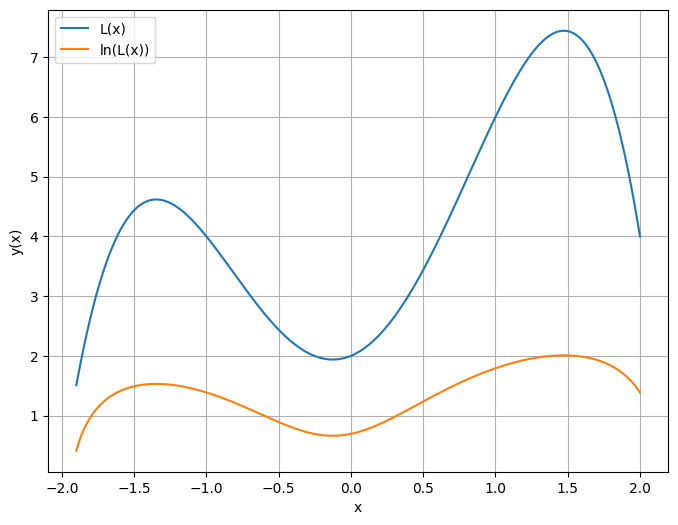

In [ ]:
import math

x = np.linspace(-1.9, 2, 1000)

plt.figure(figsize=(8, 6))
plt.plot(x, L(x), label="L(x)")
plt.plot(x, logL(x), label="ln(L(x))")
plt.xlabel("x")
plt.ylabel("y(x)")
plt.legend()
plt.grid()
plt.show()

Таким образом, можно взять
$$\ln L(X,\theta) = \sum\limits_{i=1}^n\ln p(x_i,\theta),$$ и тогда
$$\hat \theta= \arg \underset{\theta}{\max}\ \ln L(X, \theta).$$
Если функция правдоподобия дифференцируема по параметру $\theta$, то
для отыскания оценок $\theta$ можно использовать уравнения
$$\dfrac{\partial L(X,\theta)}{\partial\theta} = 0$$ или
$$\dfrac{\partial\ln L(X,\theta)}{\partial\theta} = 0,$$ то есть как
и в случае отыскания локального (глобального) максимума функции.\
\
Если функция правдоподобия непрерывно дифференцируема и для нее
выполняются условия гладкости, то оценки максимального правдоподобия
будут состоятельными и эффективны.

### Задача

Загрузим набор данных с помощью библиотеки Pandas из файла data.csv

In [ ]:
import pandas as pd

data = pd.read_csv('data.csv')
data

,X,Y
0,9,1.036766
1,5,9.137511
2,6,6.108730
3,5,0.640862
4,4,5.549188
...,...,...
95,6,6.296571
96,3,2.703184
97,5,21.733902
98,4,0.739480


Мы имеем две случайные выборки по 100 значений каждая

In [ ]:
data['X'].values

array([ 9,  5,  6,  5,  4,  3,  6,  5,  1,  9,  4,  5,  2,  2,  5,  6,  4,
        4,  7,  5,  3,  6,  3,  4,  4,  5,  4,  5,  5,  6,  4,  8,  5,  4,
        4,  4,  6,  5,  6,  4,  4,  6,  5,  5,  2,  4,  3,  5, 11,  4,  5,
        5,  3,  2,  4,  7,  8,  3,  3,  5,  7,  3,  9,  7,  9,  2,  8,  2,
        7,  2,  4,  2,  4,  7,  2,  7,  5,  5,  4,  9,  5,  5,  2,  3,  5,
        3,  5,  5,  7,  4,  6,  4,  3,  2,  4,  6,  3,  5,  4, 10])

In [ ]:
print('min(X)=' + str(data['X'].min()))
print('max(X)=' + str(data['X'].max()))

min(X)=1
max(X)=11


Скорее всего случайная выбора $X$ из дискретного распределения, так как принимает натуральные значения от 1 до 11

In [ ]:
data['Y'].values

array([1.03676578e+00, 9.13751130e+00, 6.10872953e+00, 6.40861943e-01,
       5.54918769e+00, 6.52632377e+00, 1.76183818e+00, 1.11214593e+00,
       3.91279880e+00, 1.71065045e+01, 5.91615455e+00, 4.28086634e+00,
       6.32314822e+00, 4.98551569e-01, 6.91740396e+00, 1.44007809e+00,
       3.54262111e-01, 1.05817752e+01, 2.81870966e+00, 1.01227185e+01,
       9.27313237e+00, 7.20678276e+00, 9.47369047e+00, 3.02907798e+00,
       6.47536801e+00, 1.24001938e+01, 2.21731163e+01, 9.03541012e+00,
       1.01945000e+01, 1.30918983e+00, 8.84848037e+00, 5.49329895e-01,
       3.21485504e-01, 1.02900433e+01, 3.55272388e+00, 5.98289766e+00,
       2.63808688e+00, 9.96914963e+00, 1.50856101e+01, 2.42689628e+01,
       8.31504031e-01, 1.01555027e+00, 1.05754383e+01, 2.91936712e+00,
       5.89802054e-01, 8.12944342e+00, 1.51845262e+00, 1.29719331e+01,
       3.13939134e+00, 1.00181873e+01, 1.78166658e-02, 1.66273720e+00,
       9.68581685e+00, 1.99668430e+01, 1.69259502e+00, 1.39117943e+01,
      

In [ ]:
print('min(Y)=' + str(data['Y'].min()))
print('max(Y)=' + str(data['Y'].max()))

min(Y)=0.0178166658427434
max(Y)=39.12824660515


А вот случайная выборка $Y$ из непрерывного распределения, так как принимает действительные значения от 0 до 40.

Обозначим каждую случайную выборку отдельной переменной

In [ ]:
X = data['X'].values
Y = data['Y'].values

Начнем исследование с случайной выборки X. Сперва рассмотрим ее ЭФР

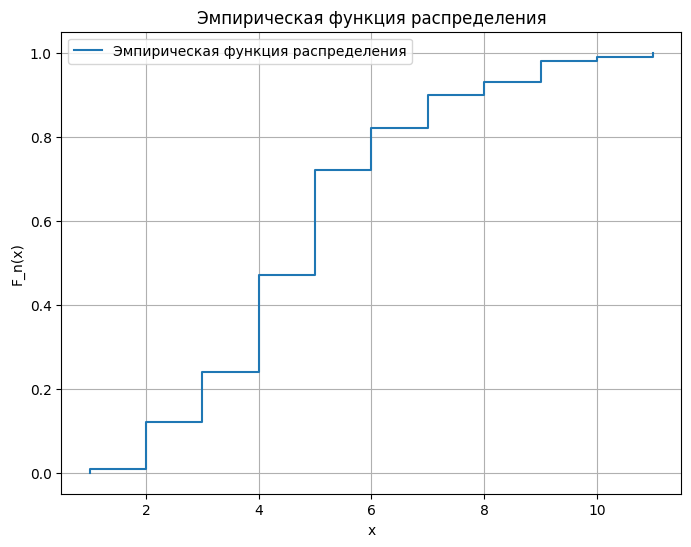

In [ ]:
cdf(X)

По ЭФР сложно понять, какое именно распределение у случайной величины. Рассмотрим еще один тип визуализации случайной выборки -- гистограмма.

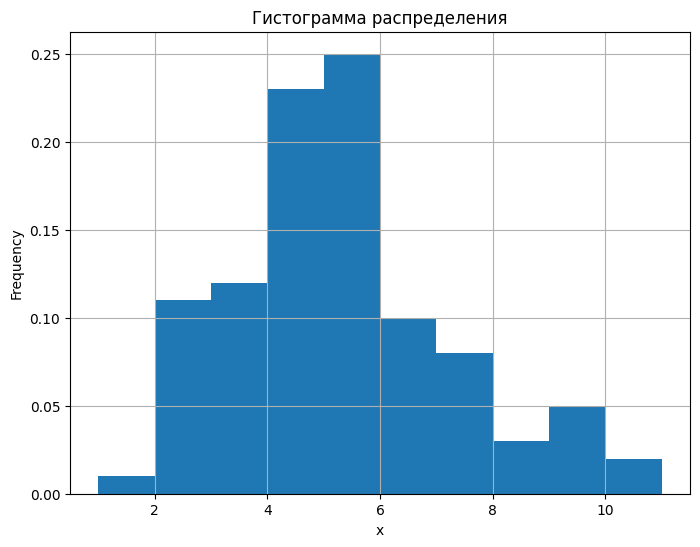

In [ ]:
def hist(data):
    plt.figure(figsize=(8, 6))
    plt.hist(data, density=True)
    plt.title("Гистограмма распределения")
    plt.xlabel("x")
    plt.ylabel("Frequency")
    plt.grid()
    plt.show()

hist(X)

Гистограмма строится в виде "значение : частота", то есть для каждого значения в выборке в соответствие ставится частота его встречаемости относительно всей выборки. Мы можем вручную рассчитать частоту встречаемости каждого значения, чтобы убедится в том, что мы не ошиблись с определением гистограммы.

In [ ]:
unique, counts = np.unique(X, return_counts=True)

In [ ]:
unique

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [ ]:
counts / len(X)

array([0.01, 0.11, 0.12, 0.23, 0.25, 0.1 , 0.08, 0.03, 0.05, 0.01, 0.01])

В итоге гистограмма распределения напоминает распределение Пуассона
$$\mathbf P\{\xi= k\} = \frac{\theta^k}{k!}e^{-\theta}, \theta> 0.$$
Найдем оценку параметра $\theta$.\
\
Сперва нам нужно записать наше распределение Пуассона в виде плотности
распределения. Считаем, что случайная выборка имеет плотность
распределения
$$p_\xi(x,\theta) = \frac{\theta^{x_k}}{x_k!}e^{-\theta},\ \theta> 0.$$
Тогда мы можем составить функцию правдоподобия
$$L(X,\theta) = \prod_{i=1}^n \frac{\theta^{x_i}}{x_i!}e^{-\theta} = \frac{\theta^{\sum\limits_{i=1}^nx_i}}{\prod_{i=1}^nx_i!}e^{-n\theta}.$$
Исследовать на экстремум эту функцию сложно, поэтому мы упростим ее,
взяв логарифм от функции правдоподобия,
$$\ln L(X, \theta) = \ln \theta\cdot \sum\limits_{i=1}^nx_i - n\theta- \sum\limits_{i=1}^n\ln x_i!$$
Возьмем от этой функции производную по $\theta$ и получим
$$\dfrac{\partial\ln L(X, \theta)}{\partial\theta}= \dfrac {\sum\limits_{i=1}^nx_i}{\theta}- n.$$
Приравниваем эту производную к нулю, чтобы найти нужную нам оценку
$$\dfrac {\sum\limits_{i=1}^nx_i}{\theta}- n = 0,$$ тогда
$$\theta= \dfrac 1 n \sum\limits_{i=1}^nx_i.$$ Таким образом, мы
построили оценку параметра $\theta$, и она совпадает с выборочным
средним.

In [ ]:
theta = X.mean()
theta

4.82

В итоге случайная выборка $X$ была получена из распределения Пуассона с параметром $\approx 4.82$.

Рассмотрим случайную выборку $Y$. Построим для нее ЭФР

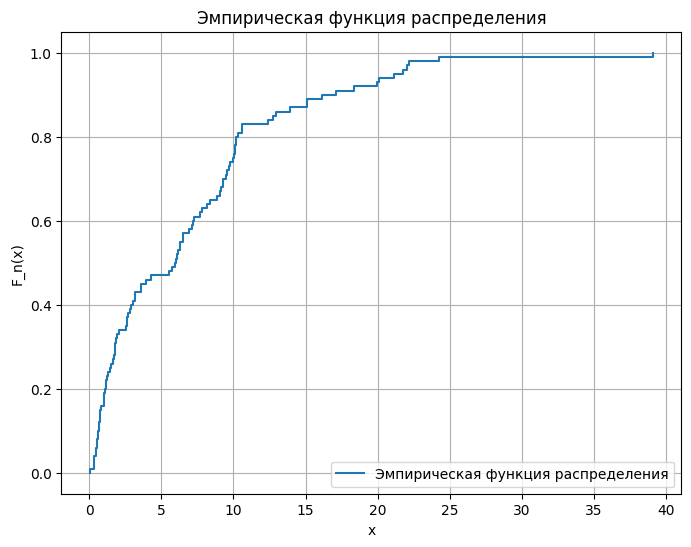

In [ ]:
cdf(Y)

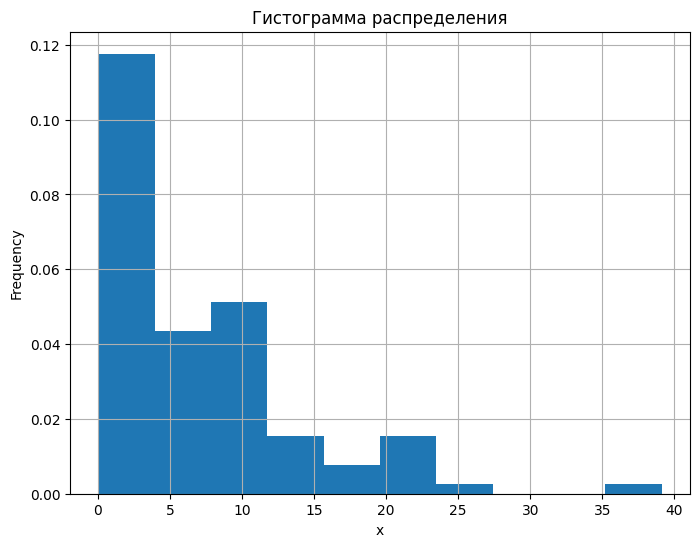

In [ ]:
hist(Y)

Из графиков ЭФР и гистограммы можно заключить, что мы имеем либо геометрическое распределение, либо экспоненциальное. Однако в силу того, что значения случайной выборки не дискретны, то среди геометрического и экспоненциального распределения мы выбираем экспоненциальное в силу того, что это непрерывное распределение (а не дискретное, как геометрическое).

Таким образом, распределение, из которого пришла выборка $Y$, задается с помощью плотности
распределения
$$p_\xi(x,\theta) = \begin{cases} \theta\cdot e^{\theta x},\ x \geqslant 0,\\ 0,\ x<0.\end{cases}$$
Тогда мы можем составить функцию правдоподобия для $x_k\geq 0$
$$L(X,\theta) = \prod_{i=1}^n \theta\cdot e^{\theta x_i} = \theta^n\cdot e^{-\theta \sum\limits_{i=1}^n x_i}.$$
Исследовать на экстремум эту функцию сложно, поэтому мы упростим ее,
взяв логарифм от функции правдоподобия,
$$\ln L(X, \theta) = n\ln \theta - \theta\sum\limits_{i=1}^n x_i.$$
Возьмем от этой функции производную по $\theta$ и получим
$$\dfrac{\partial\ln L(X, \theta)}{\partial\theta}= \dfrac n \theta - \sum\limits_{i=1}^n x_i.$$
Приравниваем эту производную к нулю, чтобы найти нужную нам оценку
$$\dfrac n \theta - \sum\limits_{i=1}^n x_i = 0,$$ тогда
$$\dfrac 1 \theta= \dfrac 1 n \sum\limits_{i=1}^nx_i.$$ Таким образом, мы
построили оценку параметра $\theta$, и она обратна выборочному среднему.

In [ ]:
theta = 1 / Y.mean()
theta

0.14324641779784097

В итоге случайная выборка $Y$ была получена из экспоненциального распределения с параметром $\approx 0.14$.

Однако это не весь жизненный цикл задачи математической статистики. Следующий этап -- оценка доверительного интервала и проверка гипотез, чтобы убедится в том, что оценка была построена правильно.